# Chapter 1 - Characteristics of Time Series

## 1.2 The Nature of Time Series Data

### Example 1.1 - 1.8

In [61]:
options(repr.plot.width=10, repr.plot.height=4)

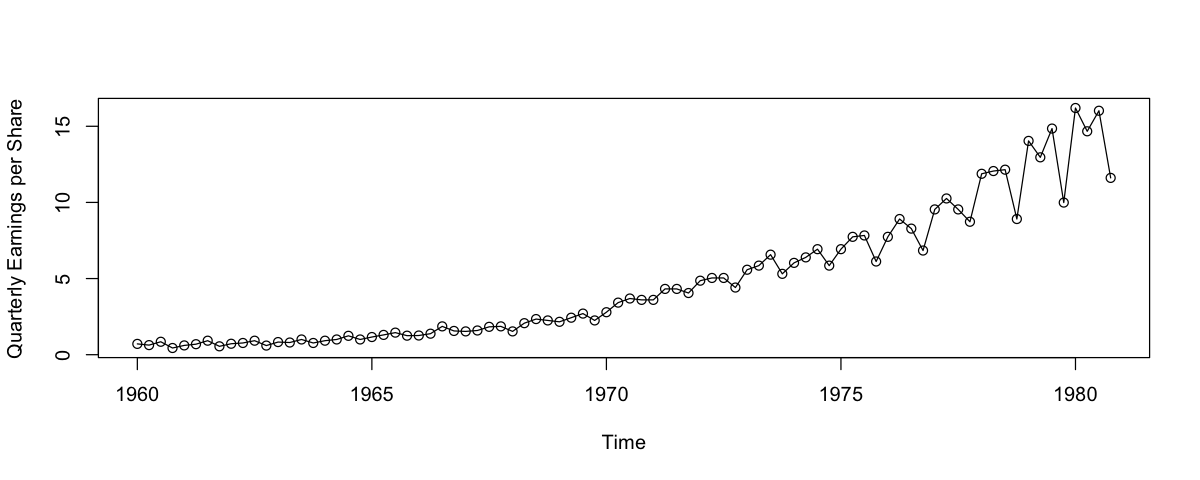

In [62]:
# Example 1.1 Financial Data
require(astsa)
plot(jj, type="o",ylab="Quarterly Earnings per Share")

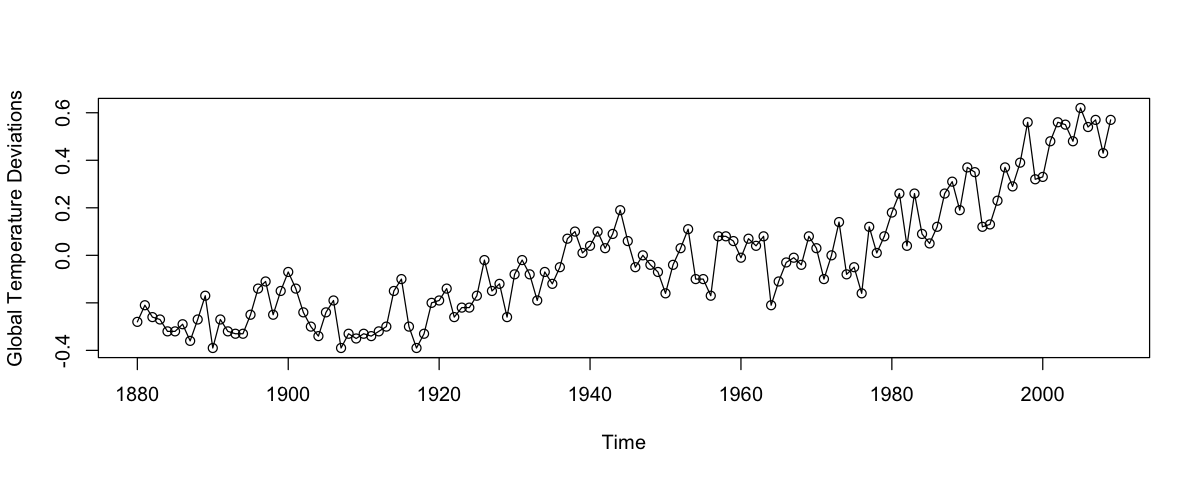

In [63]:
# Example 1.2 Global Warming
plot(gtemp,type="o",ylab="Global Temperature Deviations")

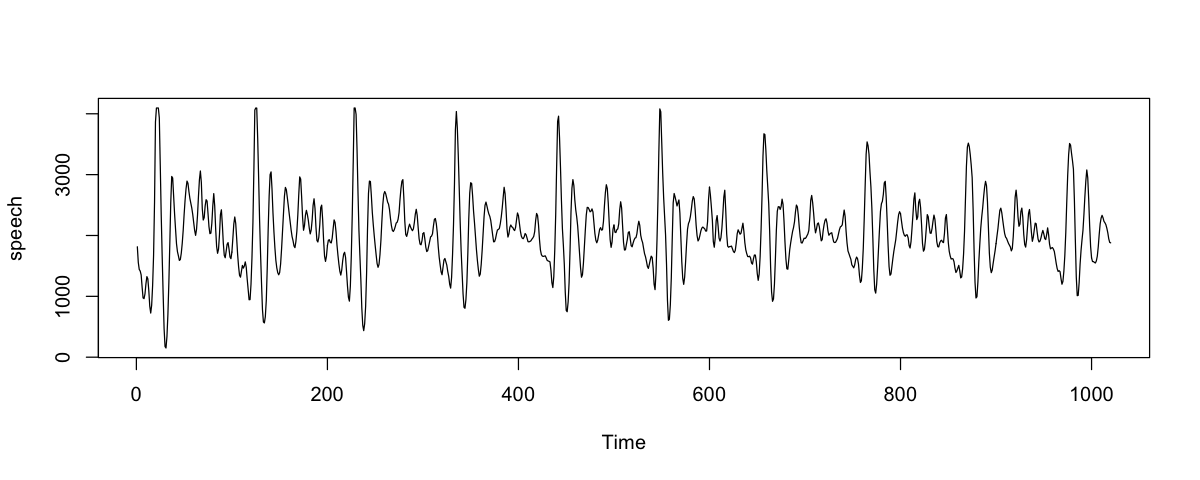

In [64]:
# Example 1.3 Speech Data
plot(speech)

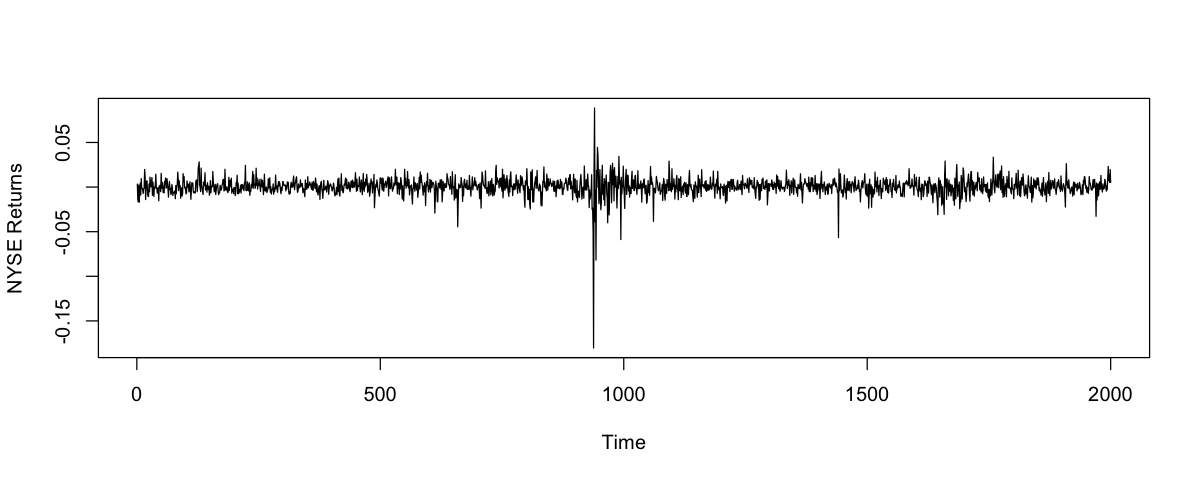

In [65]:
# Example 1.4 New York Stock Exchange market returns
plot(nyse, ylab="NYSE Returns")

In [66]:
options(repr.plot.width=10, repr.plot.height=8)

#### Par( ) Function

R makes it easy to combine multiple plots into one overall graph, using either the 
__par( )__ or __layout( )__ function.

With the __par( )__ function, you can include the option __mfrow=c(nrows, ncols)__ to create a matrix of nrows x ncols plots that are filled in by row. __mfcol=c(nrows, ncols)__ fills in the matrix by columns.

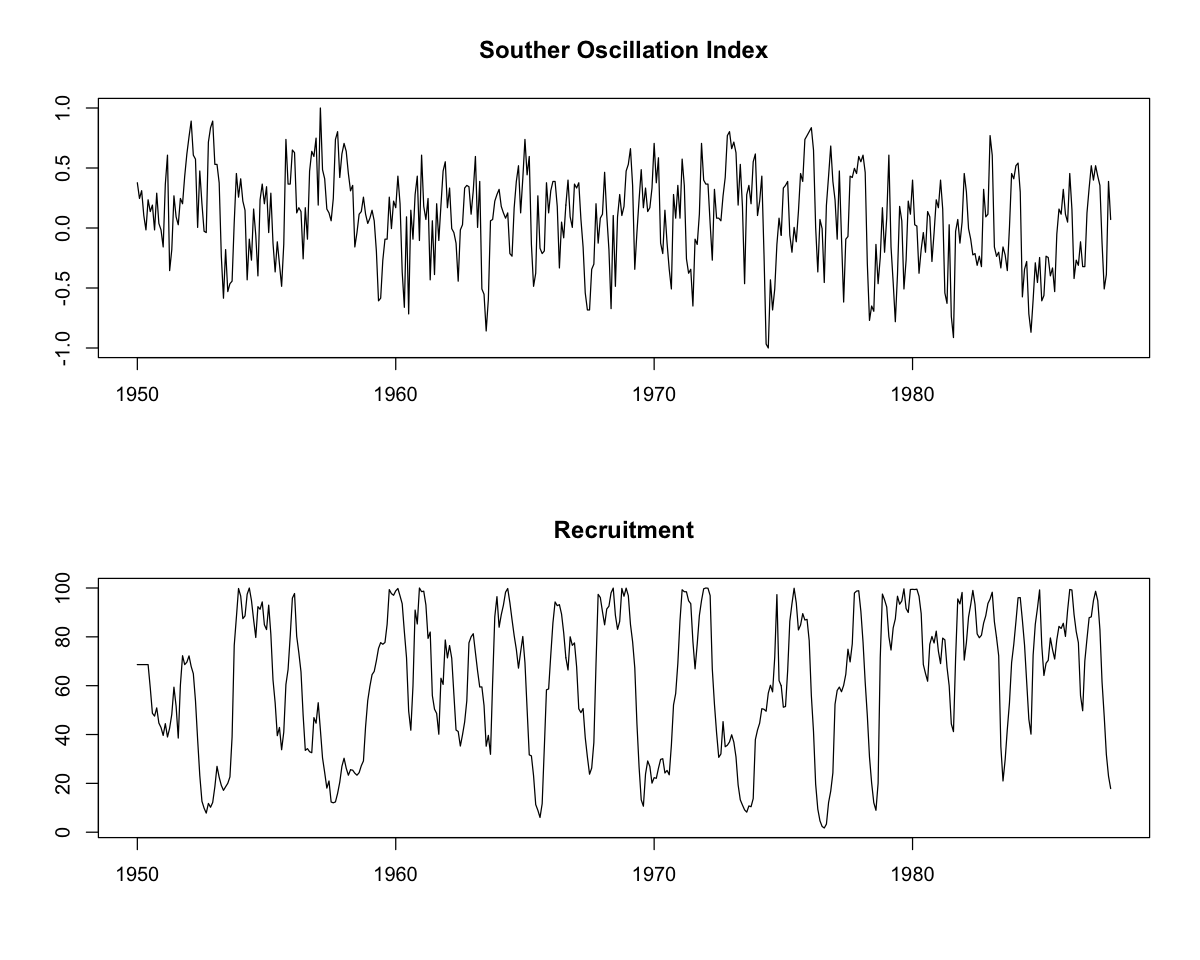

In [67]:
# Example 1.5 El Nino and Fish Population
par(mfrow=c(2,1)) #set up the graphics
plot(soi, ylab="", xlab="",main="Souther Oscillation Index" )
plot(rec, ylab="", xlab="",main="Recruitment" )

#### Margins and Graph Size

__par__ sets or adjusts plotting parameters. Here we consider the following two parameters: margin size (__mar__) and axis label locations (__mgp__).

__mar__ – A numeric vector of length 4, which sets the margin sizes in the following order: bottom, left, top, and right. The default is c(5.1, 4.1, 4.1, 2.1).

__mgp__ – A numeric vector of length 3, which sets the axis label locations relative to the edge of the inner plot window. The first value represents the location the labels (i.e. xlab and ylab in plot), the second the tick-mark labels, and third the tick marks. The default is c(3, 1, 0).

For complete information on margins, see Earl F. Glynn's [margin tutorial](http://research.stowers-institute.org/efg/R/Graphics/Basics/mar-oma/index.htm).

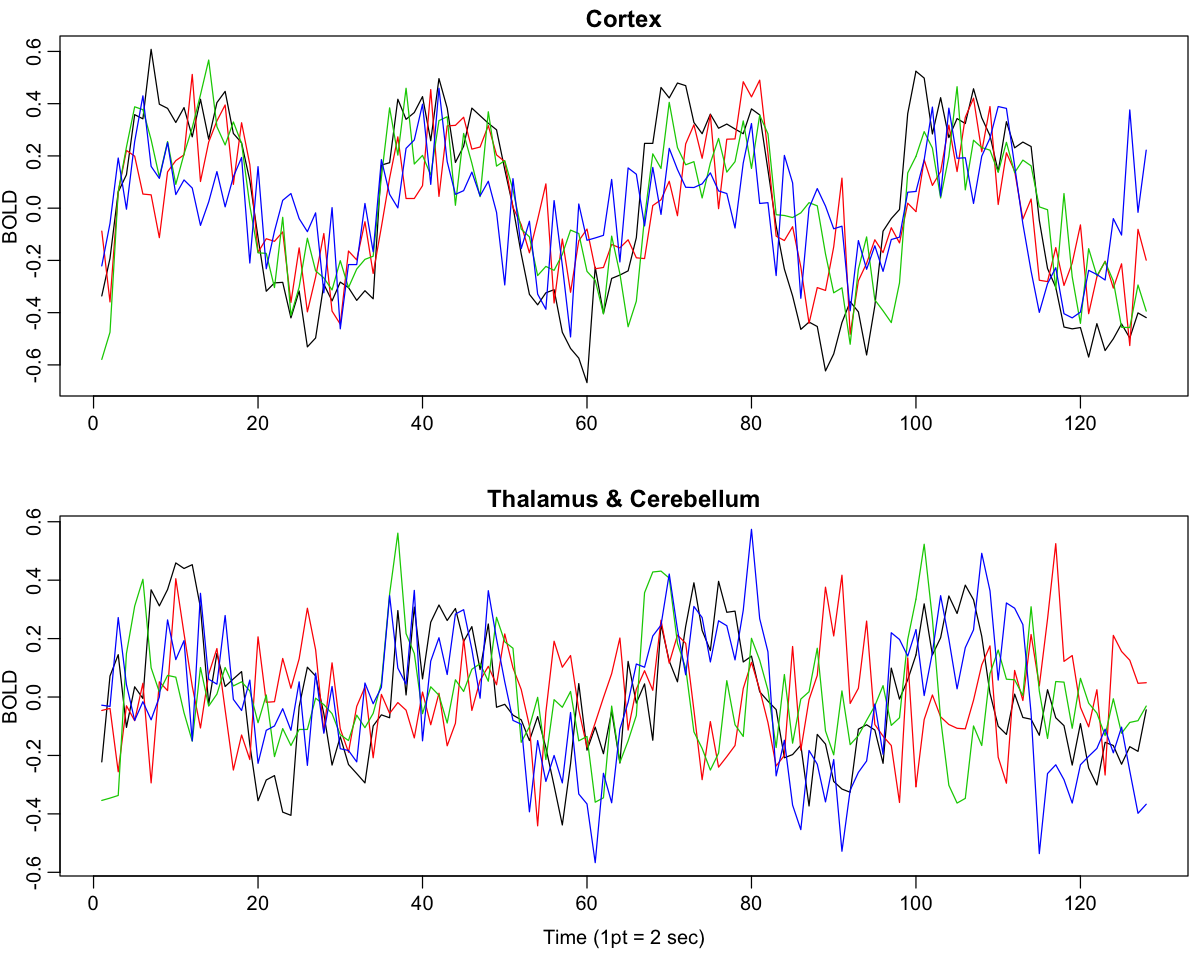

In [68]:
# Example 1.6 fMRI  Imaging
par(mfrow=c(2,1), mar = c(3,2,1,0)+.5, mgp=c(1.6,.6,0))
ts.plot(fmri1[,2:5],col=1:4, ylab="BOLD",xlab="",main="Cortex")
ts.plot(fmri1[,6:9],col=1:4, ylab="BOLD",xlab="",main="Thalamus & Cerebellum")
mtext("Time (1pt = 2 sec)",side=1,line=2)

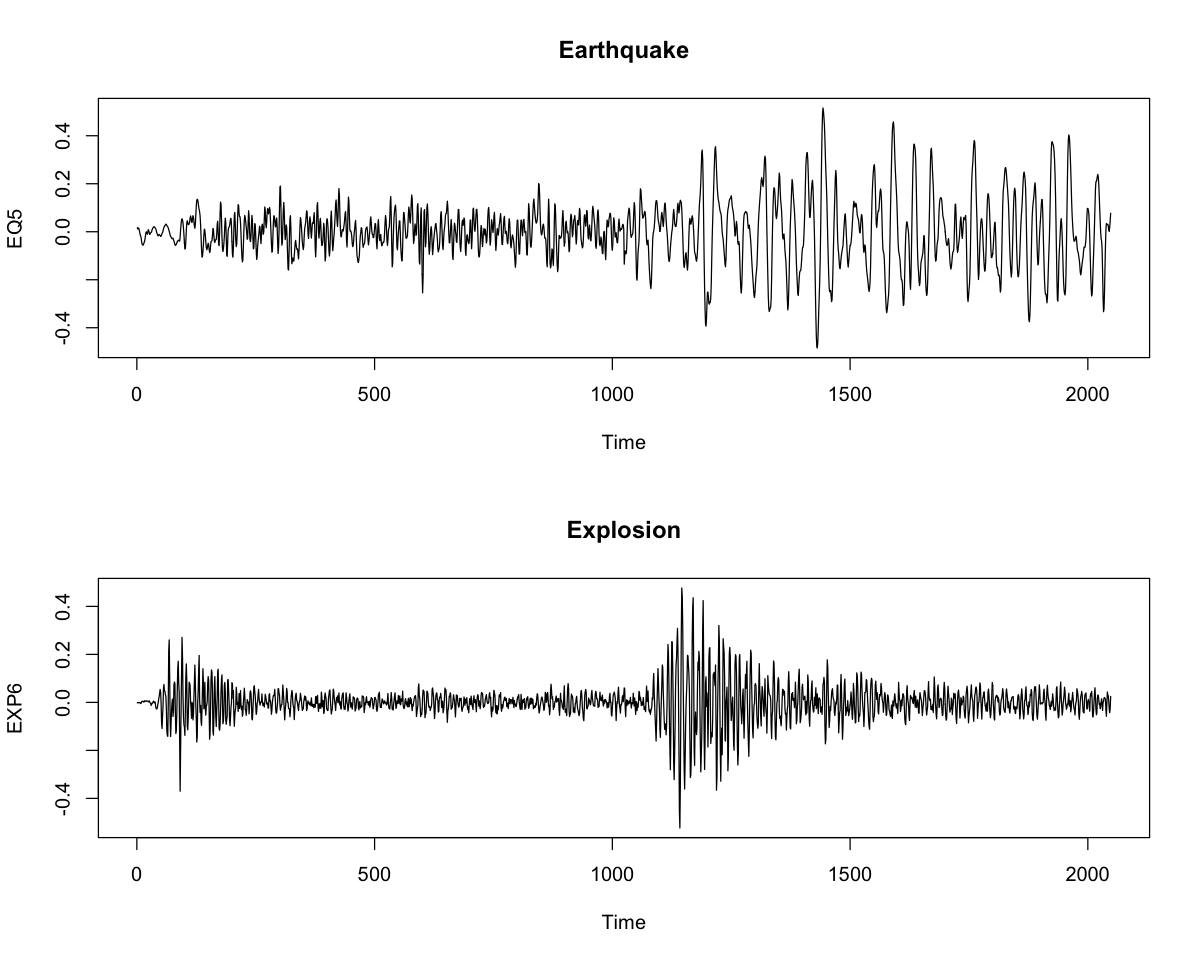

In [69]:
# Example 1.7
par(mfrow=c(2,1))
plot(EQ5, main="Earthquake")
plot(EXP6, main="Explosion")

## 1.3 Time Series Statistical Models

### Example 1.8 - 1.9 White Noise, Moving Averages and Filtering

Considering a white noise $w_t$, in this example we replace this noise with an average of its current value and its immediate neighbors in the past and future, that is
$$ v_t=\frac{1}{3}(w_{t-1} + w_t + w_{t+1})$$
A linear combination of values in a time series is referred generically, to as a filtered series, hence we use the command "filter"

In [70]:
options(repr.plot.width=10, repr.plot.height=8)

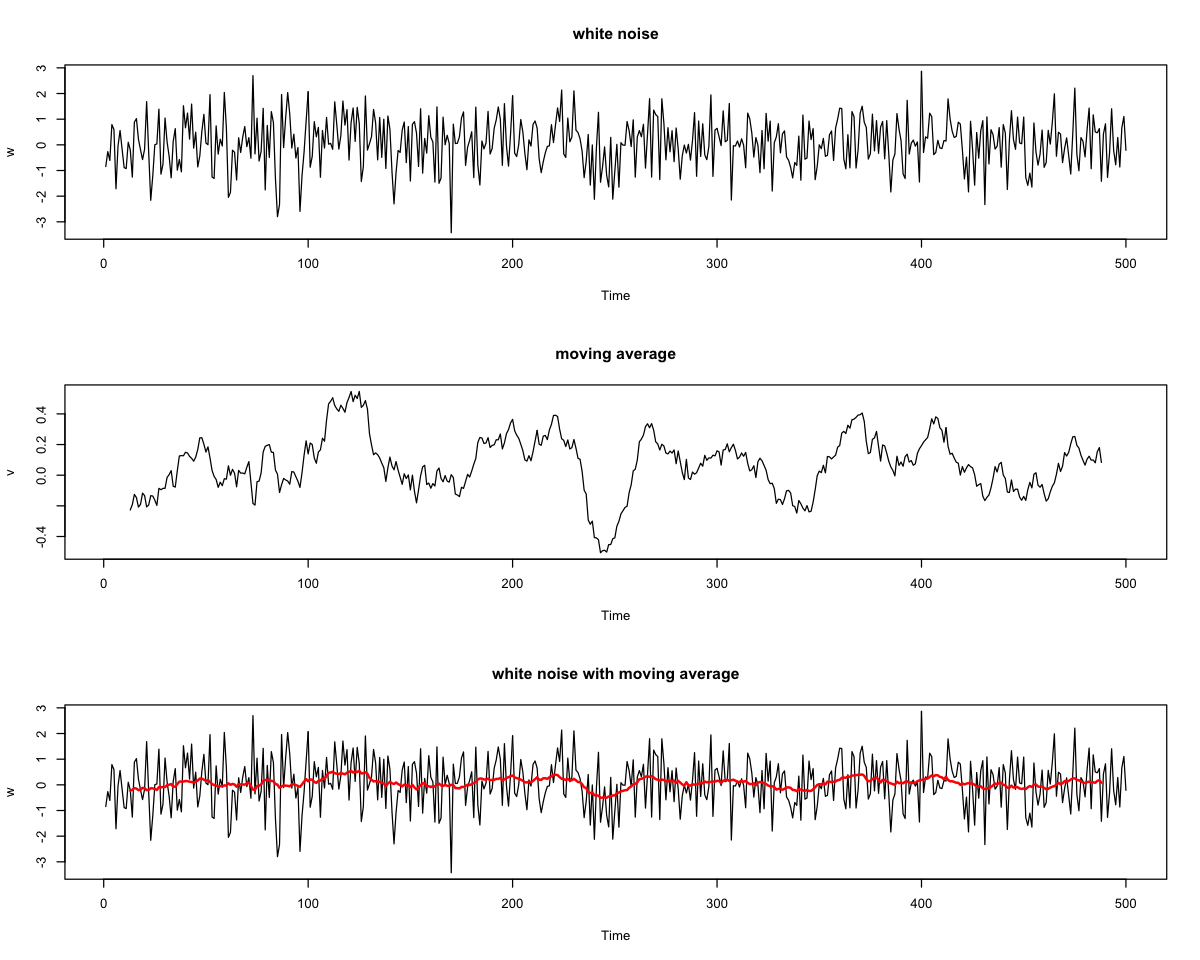

In [71]:
npoints = 500
size    = 25

w=rnorm(npoints)
v=filter(w,sides=2,filter=rep(1/size,size))

par(mfrow=c(3,1))
plot.ts(w, main='white noise')
plot.ts(v, main='moving average')
plot.ts(w, main='white noise with moving average')
lines(v, col='red', lwd=2)
# Same computation of the previous example with an user defined function 
ma <- function(x,n=3){filter(x,rep(1/n,n), sides=2)}
w=rnorm(1000)
v=ma(w)

### Example 1.10 Autoregression

Suppose we consider the white noise of the previous example as input and calculate the output using the second-order equation
$$x_t=x_{t-1} -.9 x_{t-2}+w_t $$
This equation represents a regression or prediction of the current value of $x_t$ of a time series as a function of the past two values of the series and, hence, the term 'autoregression' is used for this model

In [72]:
options(repr.plot.width=10, repr.plot.height=5)

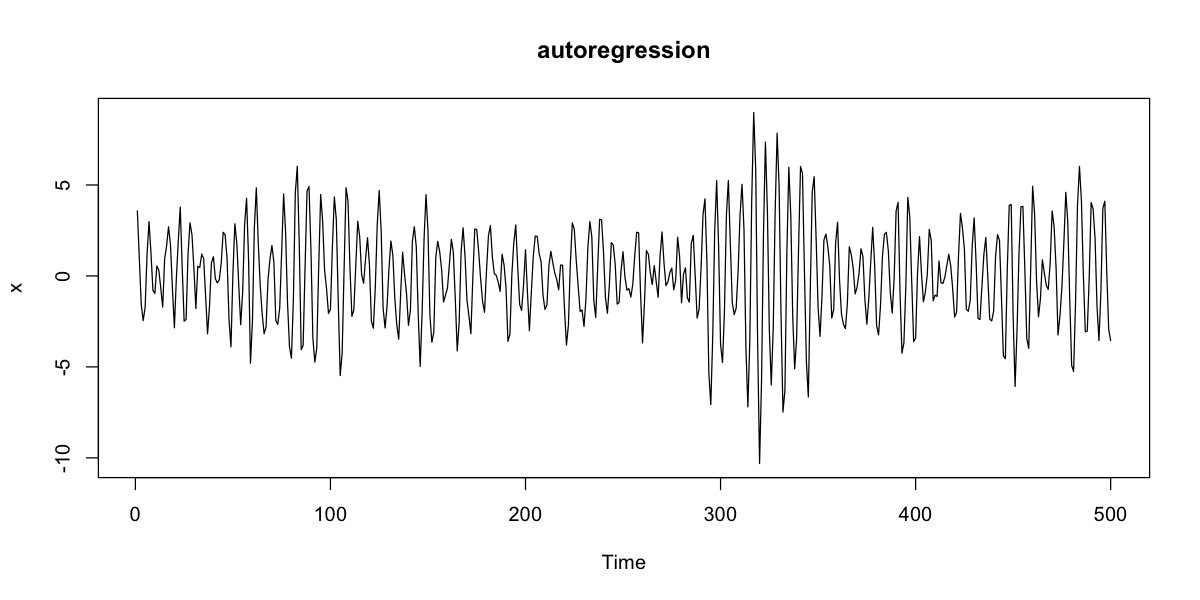

In [73]:
w=rnorm(550,0,1)
x= filter(w, filter=c(1,-.9),method="recursive")[-(1:50)]
plot.ts(x, main="autoregression")

### Example 1.11 Random walk with drift

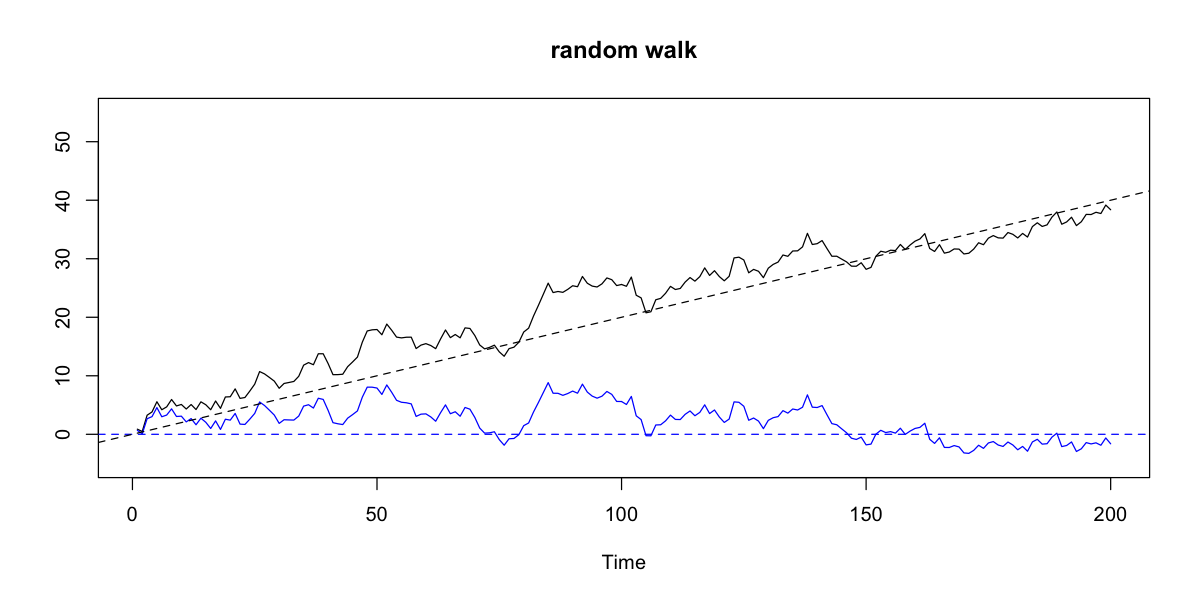

In [74]:
w=rnorm(200,0,1)
x=cumsum(w)
wd=w+.2
xd=cumsum(wd)
plot.ts(xd,ylim=c(-5,55),main="random walk",ylab='')
lines(x,col=4)
abline(h=0,col=4,lty=2)
abline(a=0,b=.2,lty=2)

### Example 1.12 Signal in Noise

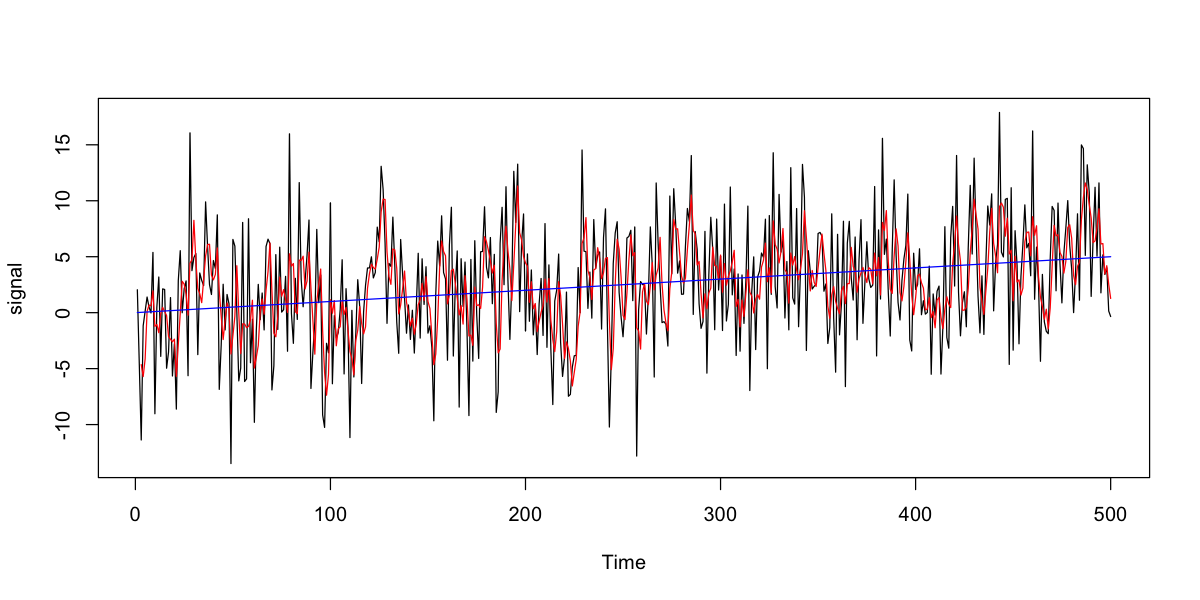

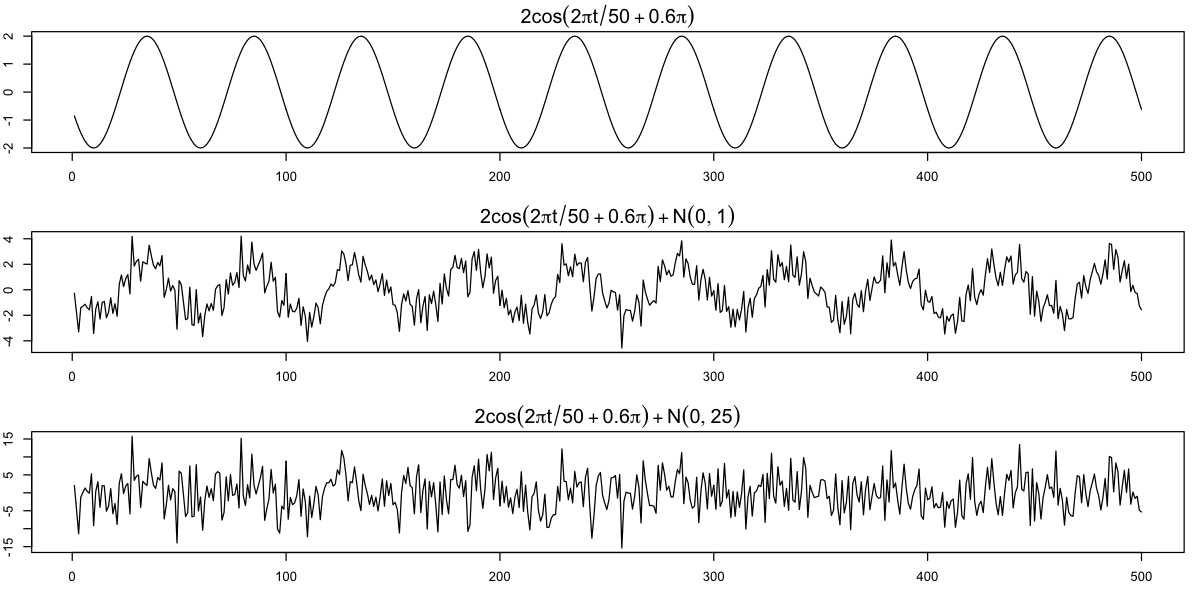

In [75]:
# periodic signal
cs     = 2*cos(2*pi*1:500/50+.6*pi)
# white noise
w      = rnorm(500,0,1)
wd     = 5*w

x      = seq(1:500)
drift  = .01*x

signal = cs + wd + drift
plot.ts(signal)

v=filter(signal,sides=1,filter=rep(1/3,3))
lines(v,col='red')
lines(drift, col = 'blue')

par(mfrow=c(3,1), mar=c(3,2,2,1),cex.main=1.5)
plot.ts(cs,main=expression(2*cos(2*pi*t/50+.6*pi)))
plot.ts(cs+w, main=expression(2*cos(2*pi*t/50+.6*pi)  + N(0,1)))
plot.ts(cs+5*w,main=expression(2*cos(2*pi*t/50+.6*pi) + N(0,25)))

## 1.4 Measures of Dependence: Autocorrelation and Cross-Correlation

The autocovariance function is defined as the second moment product

\begin{equation}
 \gamma (s,t) = cov(x_s,x_t) = E[(x_s-\mu_s)(x_t-\mu_t)]
\end{equation}

The white noise series $w_t$ has $\mathbb{E}(w_t)=0$ and 
$$
\gamma_w(t,s)= cov(w_s, w_t) = \begin{cases} \sigma^2_w & s=t, \\ 0 & s \ne t
\end{cases}
$$

In order to test this result we'll use the function shift which produce a shifted vector of a predefined amount.

In [76]:
shift<-function(x,shift_by){
  stopifnot(is.numeric(shift_by))
  stopifnot(is.numeric(x))
  
  if (length(shift_by)>1)
    return(sapply(shift_by,shift, x=x))
  
  out<-NULL
  abs_shift_by=abs(shift_by)
  if (shift_by > 0 )
    out<-c(tail(x,-abs_shift_by),rep(NA,abs_shift_by))
  else if (shift_by < 0 )
    out<-c(rep(NA,abs_shift_by), head(x,-abs_shift_by))
  else
    out<-x
  out
}

For example let's produce a shifted series of the white noise. Note that, in order to avoid NA points, we have to take only $n - 1$ points where $n$ is the original length of the $w$ series.

In [77]:
# white noise
w      = rnorm(10000,0,1)
v  = filter(w,sides=2,filter=rep(1/3,3))
n  = length(w)
ww = shift(w, 1)[1:n-1]
w  = w[1:n-1] 

cat('covariance of w(t,t+1) = ',  cov(w,ww), "\n")

covariance of w(t,t+1) =  -0.006455474 


Let's compute the autocovariance of the moving average process. 
The process is described by the filter

$$ v_t=\frac{1}{3}(w_{t-1} + w_t + w_{t+1})$$

Then

$$\gamma(s,t)=cov \left[ \frac{1}{3}(w_{s-1} + w_s + w_{s+1}), \frac{1}{3}(w_{t-1} + w_t + w_{t+1})  \right]$$

We can summarize the values for all $s$ and $t$ for the $v$ process as:

$$
\gamma_v(s,t)= \begin{cases}
\frac{3}{9} \sigma^2_w & s=t, \\
\frac{2}{9} \sigma^2_w & \vert s - t \vert = 1, \\
\frac{1}{9} \sigma^2_w & \vert s - t \vert = 2, \\
0                      & \vert s - t \vert > 2 \\
\end{cases}
$$

Let's try to test these results

In [78]:
v = v[3:length(v)-1]

#cat('variance of v        = ',  var(w), "\n")
cat('covariance of v(t,t) = ',  cov(v,v), "\n")
cat('3*sigma^2 / 9        = ',  3*var(w)/9, "\n")

covariance of v(t,t) =  0.3331914 
3*sigma^2 / 9        =  0.3376808 


In [79]:
n  = length(v)
vv = shift(v,1)
vv = vv[1:n-1]
v  = v[1:n-1]

cat('covariance of v(t,t+1) = ',  cov(v,vv), "\n")
cat('2*sigma^2 / 9          = ',  2*var(w)/9, "\n")

covariance of v(t,t+1) =  0.220257 
2*sigma^2 / 9          =  0.2251205 


In [80]:
n  = length(v)
vv = shift(vv,1)
vv = vv[1:n-1]
v  = v[1:n-1]

cat('covariance of v(t,t+2) = ',  cov(v,vv), "\n")
cat('1*sigma^2 / 9          = ',  1*var(w)/9, "\n")

covariance of v(t,t+2) =  0.1099675 
1*sigma^2 / 9          =  0.1125603 


In [81]:
n  = length(v)
vv = shift(vv,1)
vv = vv[1:n-1]
v  = v[1:n-1]

cat('covariance of v(t,t+3) = ',  cov(v,vv), "\n")

covariance of v(t,t+3) =  -0.0001289879 


## 1.5 Stationary Time Series

__DEFINITION__. A __strictly stationary__ time series is one for which the probabilistic behavior of every collection of values

$$\{ x_{t_1},x_{t_2},\dots,x_{t_k} \}$$ 

is identical to that of the time shifted set

$$\{ x_{t_1+h},x_{t_2+h},\dots,x_{t_k+h} \}$$ 

### Autocorrelation function acf( )

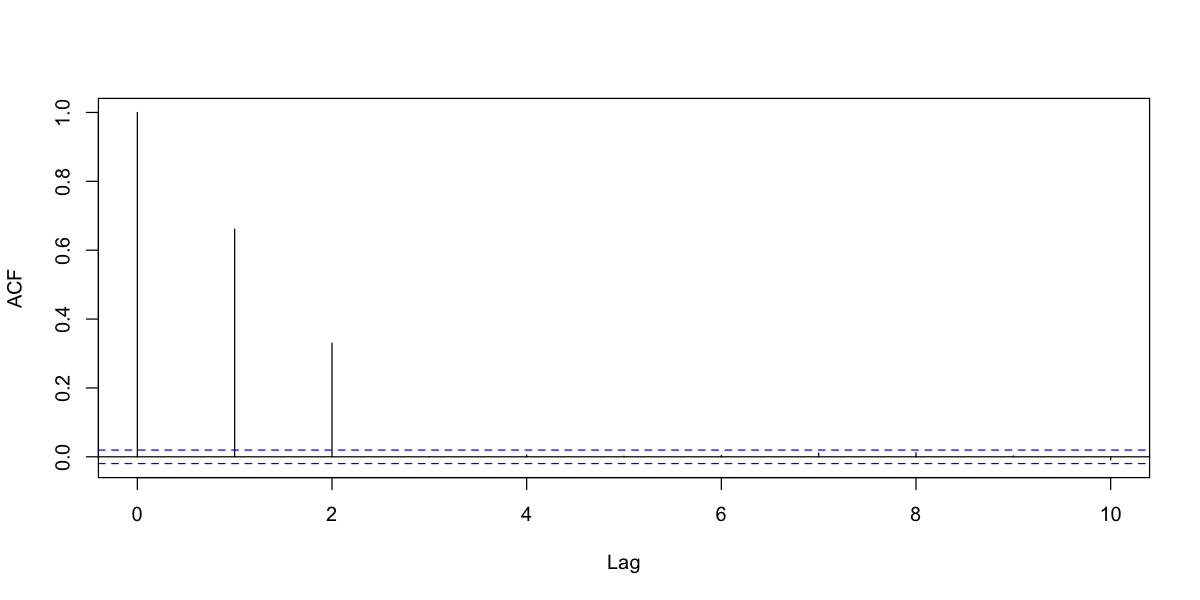

In [82]:
v  = filter(w,sides=2,filter=rep(1/3,3))
acf(v[3:length(v)-1], lag.max=10, main="")